Rafaël Brutti

rafael.brutti@telecom-paris.fr

# Exercise 1: Hasting-Metropolis within Gibbs – Stochastic Approximation EM

## A population model for longitudinal data

### Question 1

$z = ({t}_0,{v}_0,\xi,\tau_i) \text{ and } \theta = (\bar{t}_0,\bar{v}_0,\sigma_{\xi},\sigma_{\tau},\sigma)$


$\log(p(y,z,\theta) = \log(p(y \vert z,\theta)) + \log(p(z \vert \theta)) + \log(p(\theta))$


$\log(p(y,z,\theta)) = - \sum_{1 \leq i \leq N, 1 \leq j \leq k_i} \left( \dfrac{\vert \vert y_{ij} - d_{i}(t_{ij})\vert \vert^2}{2\sigma^2} +  \dfrac{\log(\sigma^2)}{2}\right) - \sum_{1 \leq i \leq N} \left( \dfrac{\vert \vert \xi_{i}\vert \vert^2}{2\sigma_{\xi}^2} + \dfrac{\log(\sigma_{\xi}^2)}{2} + \dfrac{\vert \vert \tau_i \vert \vert^2}{2\sigma_{\tau}^2} + \dfrac{\log(\sigma_{\tau}^2)}{2} \right)$$ 
$$- \dfrac{\vert \vert v_{0} - \bar{v}_{0}\vert \vert^2}{2\sigma_{v_0}^2} - \dfrac{\vert \vert t_{0} - \bar{t}_{0}\vert \vert^2}{2\sigma_{t_0}^2} + \log(p(\theta)) + cste$

Moreover, 

$\dfrac{\vert \vert v_{0} - \bar{v}_{0}\vert \vert^2}{2\sigma_{v_0}^2} = \dfrac{\vert \vert v_{0} \vert \vert^2 - 2.\langle v_{0},\bar{v}_{0}\rangle +  \vert \vert \bar{v}_{0} \vert \vert^2}{2\sigma_{v_0}^2}$

$\dfrac{\vert \vert t_{0} - \bar{t}_{0}\vert \vert^2}{2\sigma_{t_0}^2} = \dfrac{\vert \vert t_{0} \vert \vert^2 - 2.\langle t_{0},\bar{t}_{0}\rangle +  \vert \vert \bar{t}_{0} \vert \vert^2}{2\sigma_{t_0}^2}$

Then, 

$$\boxed{\log(p(y,z,\theta) = \langle S(y,z),\psi(\theta) \rangle + \phi(\theta) + h(z)}$$

with 

$S_1(y,z) = \sum_{1 \leq i \leq N, 1 \leq j \leq k_i} \vert \vert y_{ij} - d_{i}(t_{ij})\vert \vert^2 \qquad \text{ and }  \qquad \psi_1(\theta) = \dfrac{-1}{2\sigma^2}$

$S_2(y,z) = \sum_{1 \leq i \leq N} \vert \vert \xi_{i}\vert \vert^2 \qquad \text{ and }  \qquad \psi_2(\theta) = \dfrac{-1}{2\sigma_{\xi}^2}$

$S_3(y,z) = \sum_{1 \leq i \leq N} \vert \vert \tau_i \vert \vert^2 \qquad \text{ and }  \qquad \psi_3(\theta) = \dfrac{-1}{2\sigma_{\tau}^2}$

$S_4(y,z) = v_0 \qquad \text{ and }  \qquad \psi_4(\theta) = \dfrac{\bar{v}_0}{\sigma_{v_0}^2}$

$S_5(y,z) = t_0 \qquad \text{ and }  \qquad \psi_5(\theta) = \dfrac{\bar{t}_0}{\sigma_{t_0}^2}$

and 

$$\phi(\theta) = \dfrac{-\vert \vert \bar{v}_{0} \vert \vert^2}{2\sigma_{v_0}^2} - \dfrac{\vert \vert \bar{t}_{0} \vert \vert^2}{2\sigma_{t_0}^2} - \dfrac{\vert \vert \bar{t}_{0} - \bar{\bar{t}}_{0}\vert \vert^2}{2s_{t_0}^2} - \dfrac{\vert \vert \bar{v}_{0} - \bar{\bar{v}}_{0}\vert \vert^2}{2s_{v_0}^2} - (1 + \frac{m}{2})\log(\sigma^2) - \dfrac{v^2}{2\sigma^2} - (1 + \frac{m_{\xi}}{2})\log(\sigma_{\xi}^2) - \dfrac{v_{\xi}^2}{2\sigma_{\xi}^2} - (1 + \frac{m_{\tau}}{2})\log(\sigma_{\tau}^2) - \dfrac{v_{\tau}^2}{2\sigma_{\tau}^2} + cste$$


$$h(z) = \dfrac{-\vert \vert v_{0} \vert \vert^2}{2\sigma_{v_0}^2} - \dfrac{\vert \vert t_{0} \vert \vert^2}{2\sigma_{t_0}^2}$$

### Question 2

In [1]:
from scipy.stats import invwishart, norm, expon, multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import bernoulli, expon, uniform
import scipy

from copy import deepcopy

import warnings
warnings.filterwarnings('ignore')

In [2]:
randomstate = 1
m_xi, m_tau, m = 3, 4, 4
v_xi, v_tau, v = 0.5, 0.3, 0.4
t0_barbar, v0_barbar = 1, 2
st0, sv0 = 1, 1

sigma_xi = np.sqrt(invwishart.rvs(df = m_xi, scale = v_xi, size = 1, random_state = randomstate))
sigma_tau = np.sqrt(invwishart.rvs(df = m_tau, scale = v_tau, size = 1, random_state = randomstate))
sigma = np.sqrt(invwishart.rvs(df = m, scale = v, size = 1, random_state= randomstate))

t0_bar = norm.rvs(loc = t0_barbar, scale = st0, size = 1, random_state = randomstate)
v0_bar = norm.rvs(loc = v0_barbar, scale = sv0, size = 1, random_state = randomstate)

##### σt0 , σv0 are fixed variance parameters #####
sigmat0 = 1
sigmav0 = 1
###################################################

t0 = norm.rvs(loc = t0_bar, scale = sigmat0, size = 1, random_state = randomstate)
v0 = norm.rvs(loc = v0_bar, scale = sigmav0, size = 1, random_state = randomstate)

###################################################
###### for simplicity I assume that for the all individuals ki = K 
###### While we consider straight lines, we can also fix p0. 

p0 = 0
nb_individuals = 20
K = 20
t = np.linspace(0,5,K)

y = np.zeros((nb_individuals,1,K))
for j in range(K):
    eps =  norm.rvs(loc = 0, scale = sigma, size = nb_individuals).reshape(nb_individuals,1)
    xi = norm.rvs(loc = 0, scale = sigma_xi, size = nb_individuals).reshape(nb_individuals,1)
    alpha = np.exp(xi).reshape(nb_individuals,1)
    tau = norm.rvs(loc = 0, scale = sigma_tau, size = nb_individuals).reshape(nb_individuals,1)
    y[:,:,j] = p0 * np.ones((nb_individuals,1)) + v0 * (t[j] - t0 - tau) * alpha + eps
y = y.reshape(nb_individuals,K)

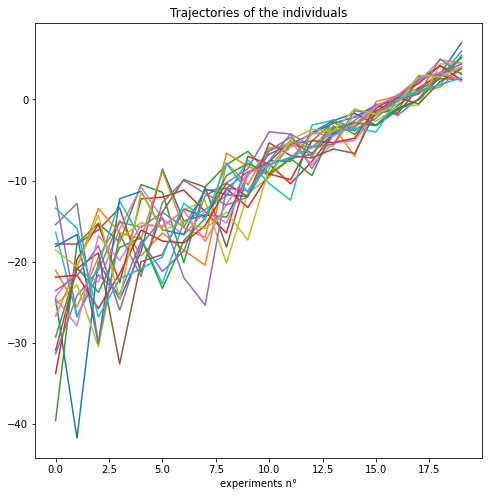

In [3]:
plt.figure(figsize=(8,8))
plt.title('Trajectories of the individuals')

for i in range(nb_individuals):
    plt.plot(y[i,:])
plt.xlabel('experiments n°')
plt.show()

## HM-SAEM – Hasting-Metropolis sampler

### Question 3

Let's propose a Metropolis-Hastings sampler to sample from the a posteriori distribution of the latent
variable z.

$z = (t_{0},{v}_0,\xi,\tau_i) \text{ and } \theta = (\bar{t}_0,\bar{v}_0,\sigma_{\xi},\sigma_{\tau},\sigma)$


$\pi(z) = p(z \vert y, \theta) = \dfrac{q(z,y,\theta)}{q(y,\theta)} = \dfrac{q(y \vert z, \theta).q(z \vert \theta).q(\theta)}{q(y,\theta)}$

Let's considerate : 
$\alpha_k = \dfrac{\pi(z^*)}{\pi(z_k)} = \dfrac{q(y \vert z^*, \theta).q(z^* \vert \theta)}{q(y \vert z_k, \theta).q(z_k \vert \theta)}$

From the hierarchical model, 
$q(y \vert z, \theta) =  \prod_{i=1, j =1}^{i = N, j = k_i} \quad \dfrac{{\exp {\dfrac{-\vert \vert y_{ij} - d_{i}(t_{ij})\vert \vert^2}{2\sigma^2}}}}{\sqrt{2\pi\sigma^2}}$

$q(z \vert \theta) = \dfrac{{\exp {\dfrac{-\vert \vert t_{0} - \bar{t}_0 \vert \vert^2}{2\sigma_{t_0}^2}}}}{\sqrt{2\pi\sigma_{t_0}^2}}.\dfrac{{\exp {\dfrac{-\vert \vert v_{0} - \bar{v}_0 \vert \vert^2}{2\sigma_{v_0}^2}}}}{\sqrt{2\pi\sigma_{v_0}^2}}.\prod_{i=1}^{N} \left(\dfrac{{\exp {\dfrac{-\vert \vert \xi_i\vert \vert^2}{2\sigma_{\xi}^2}}}}{\sqrt{2\pi\sigma_{\xi}^2}}.\dfrac{{\exp {\dfrac{-\vert \vert \tau_i\vert \vert^2}{2\sigma_{\tau}^2}}}}{\sqrt{2\pi\sigma_{\tau}^2}}\right)$


Finally, 

$\log(\alpha_k) = \dfrac{\vert \vert t_{0,k} -\bar{t}_0 \vert \vert^2}{2\sigma_{t_{0}}^2} + \dfrac{\vert \vert v_{0,k} - \bar{v}_0 \vert \vert^2}{2\sigma_{v_{0}}^2} + \sum_{i=1}^{N} (\dfrac{\vert \vert \xi_{i,k}\vert \vert^2}{2\sigma_{\xi}^2} + \dfrac{\vert \vert \tau_{i,k}\vert \vert^2}{2\sigma_{\tau}^2}) + \sum_{i=1, j =1}^{i = N, j = k_i} \quad \dfrac{\vert \vert y_{ij} - d_{i,k}(t_{ij})\vert \vert^2}{2\sigma^2} - \left(\dfrac{\vert \vert t_{0}^* -\bar{t}_0 \vert \vert^2}{2\sigma_{t_{0}}^2} + \dfrac{\vert \vert v_{0}^* - \bar{v}_0 \vert \vert^2}{2\sigma_{v_{0}}^2} + \sum_{i=1}^{N} (\dfrac{\vert \vert \xi_{i}^*\vert \vert^2}{2\sigma_{\xi}^2} + \dfrac{\vert \vert \tau_{i}^*\vert \vert^2}{2\sigma_{\tau}^2}) + \sum_{i=1, j =1}^{i = N, j = k_i} \quad \dfrac{\vert \vert y_{ij} - d_{i,k}^*(t_{ij})\vert \vert^2}{2\sigma^2}\right)$

In [4]:
def distance(y,z):

    nb_individuals, K  = y.shape
    
    (t0, v0, xi, tau) = z
    d = np.zeros((nb_individuals,1,K))
    
    for j in range(K): 
            d[:,:,j] = p0 * np.ones((nb_individuals,1)) + v0 * (t[j] - t0 - tau) * np.exp(xi)
        
    return d.reshape((nb_individuals,K))

In [5]:
sigma_prop = 0.01
def proposal_distribution(z):
    (t, v, xi, tau) = z
    t_star = norm.rvs(loc = t, scale = sigma_prop*np.eye(1), size = 1)
    v_star = norm.rvs(loc = v, scale = sigma_prop*np.eye(1), size = 1)
    xi_star = multivariate_normal.rvs(mean = xi.squeeze(), cov = sigma_prop*sigma_xi*np.eye(xi.shape[0]))
    xi_star = xi_star.reshape(-1,1)
    tau_star = multivariate_normal.rvs(mean = tau.squeeze(), cov = sigma_prop*sigma_tau*np.eye(tau.shape[0]))
    tau_star = tau_star.reshape(-1,1)
    return (t_star, v_star, xi_star, tau_star)
    
def Hasting_Metropolis_Sampler(z0, maxIter):
    
    sampling = [z0]
    
    for k in range(maxIter+1):
        (t0_k, v0_k, xi_k, tau_k) = sampling[-1]
        (t_star, v_star, xi_star, tau_star) = proposal_distribution(z = (t0_k, v0_k, xi_k, tau_k))
        tau_k = tau_k.reshape(-1,1)
        xi_k = xi_k.reshape(-1,1)
        
        log_pi = ((t0_k - t0_bar)**2 - (t_star - t0_bar)**2)/(2*sigmat0**2)
        log_pi += ((v0_k - v0_bar)**2 - (v_star - v0_bar)**2)/(2*sigmav0**2)
        log_pi += (np.linalg.norm(xi_k)**2 - np.linalg.norm(xi_star)**2)/(2*sigma_xi**2)
        log_pi += (np.linalg.norm(tau_k)**2 - np.linalg.norm(tau_star)**2)/(2*sigma_tau**2)
        
        d_k = distance(y,(t0_k, v0_k, xi_k, tau_k))
        d_star = distance(y,(t_star, v_star, xi_star, tau_star))
        
        log_pi += (np.linalg.norm(y - d_k)**2 - np.linalg.norm(y - d_star)**2)/(2*sigma**2)
    
        if log_pi < 0 :
            log_alpha = log_pi
            log_U = np.log(np.random.rand(1))
            if log_U <= log_alpha  :
                z_k = (t_star, v_star, xi_star, tau_star)
                
            else : 
                z_k = (t0_k, v0_k, xi_k, tau_k)
                
        else : 
            z_k = (t_star, v_star, xi_star, tau_star)
          

        sampling.append(z_k)
        
    return sampling

In [6]:
z0 = t0, v0, xi, tau
maxIter = 2000
sampling = Hasting_Metropolis_Sampler(z0, maxIter)

In [7]:
def normtuple(x,y): 
    s = 0
    for i in range(len(y)):
        s += np.linalg.norm(x[i]-y[i])
    return s

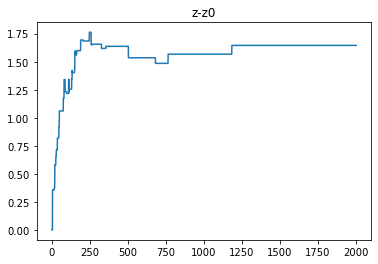

In [8]:
plt.title('z-z0')
plt.plot(range(len(sampling)), [normtuple(s,z0) for s in sampling])

In [9]:
t0_random = norm.rvs(loc = 10, scale = sigma_prop*np.eye(1), size = 1)
v0_random = norm.rvs(loc = 20, scale = sigma_prop*np.eye(1), size = 1)
xi_random = norm.rvs(loc = 4, scale = sigma_xi, size = nb_individuals).reshape(nb_individuals,1)
tau_random = norm.rvs(loc = -1, scale = sigma_tau, size = nb_individuals).reshape(nb_individuals,1)

In [10]:
z_random = t0_random, v0_random, xi_random, tau_random

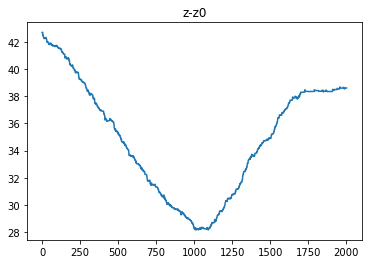

In [11]:
plt.title('z-z0')
sampling = Hasting_Metropolis_Sampler(z_random, maxIter)
plt.plot(range(len(sampling)), [normtuple(s,z0) for s in sampling])

### Question 4

$$\log(p(y,z,\theta)) = - \sum_{1 \leq i \leq N, 1 \leq j \leq k_i} \left( \dfrac{\vert \vert y_{ij} - d_{i}(t_{ij})\vert \vert^2}{2\sigma^2} +  \dfrac{\log(\sigma^2)}{2}\right) - \sum_{1 \leq i \leq N} \left( \dfrac{\vert \vert \xi_{i}\vert \vert^2}{2\sigma_{\xi}^2} + \dfrac{\log(\sigma_{\xi}^2)}{2} + \dfrac{\vert \vert \tau_i \vert \vert^2}{2\sigma_{\tau}^2} + \dfrac{\log(\sigma_{\tau}^2)}{2} \right)$$ 

$$- \dfrac{\vert \vert v_{0} - \bar{v}_{0}\vert \vert^2}{2\sigma_{v_0}^2} - \dfrac{\vert \vert t_{0} - \bar{t}_{0}\vert \vert^2}{2\sigma_{t_0}^2} - \dfrac{\vert \vert \bar{t}_{0} - \bar{\bar{t}}_{0}\vert \vert^2}{2s_{t_0}^2} - \dfrac{\vert \vert \bar{v}_{0} - \bar{\bar{v}}_{0}\vert \vert^2}{2s_{v_0}^2} - (1 + \frac{m}{2})\log(\sigma^2) - \dfrac{v^2}{2\sigma^2}$$

$$- (1 + \frac{m_{\xi}}{2})\log(\sigma_{\xi}^2) - \dfrac{v_{\xi}^2}{2\sigma_{\xi}^2} - (1 + \frac{m_{\tau}}{2})\log(\sigma_{\tau}^2) - \dfrac{v_{\tau}^2}{2\sigma_{\tau}^2} + cste$$

$$\nabla_{\bar{t_0}} \log(p(y,z,\theta)) = - \dfrac{\bar{t}_{0}(\bar{t}_{0}- t_{0})}{\sigma_{t_0}^2} - \dfrac{\bar{t}_{0}(\bar{t}_{0}- \bar{\bar{t}}_{0})}{s_{t_0}^2} = 0$$

Then, 
$$\boxed{\bar{t}_{0} = \dfrac{\dfrac{\bar{\bar{t}}_{0}}{s_{t_0}^2} + \dfrac{t_{0}}{\sigma_{t_0}^2}}{\dfrac{1}{s_{t_0}^2} + \dfrac{1}{\sigma_{t_0}^2}}}$$

Similarly, 
$$\boxed{\bar{v}_{0} = \dfrac{\dfrac{\bar{\bar{v}}_{0}}{s_{v_0}^2} + \dfrac{v_{0}}{\sigma_{v_0}^2}}{\dfrac{1}{s_{v_0}^2} + \dfrac{1}{\sigma_{v_0}^2}}}$$

$$\nabla_{\sigma} \log(p(y,z,\theta)) = \sum_{1 \leq i \leq N, 1 \leq j \leq k_i} \left( \dfrac{\vert \vert y_{ij} - d_{i}(t_{ij})\vert \vert^2}{\sigma^3} -  \dfrac{1}{\sigma}\right)  - 2.(1 + \frac{m}{2})\dfrac{1}{\sigma} + \dfrac{v^2}{\sigma^3} = 0$$


Let's write : 
$$K' = \sum_{1 \leq i \leq N, 1 \leq j \leq k_i} 1 \qquad (= K.N \text{ here})$$

$$\boxed{\sigma^2 = \dfrac{v^2 + \sum_{1 \leq i \leq N, 1 \leq j \leq k_i}  \vert \vert y_{ij} - d_{i}(t_{ij})\vert \vert^2}{2+K'+m}}$$

Similarly, 

$$\boxed{\sigma_{\tau}^2 = \dfrac{v_{\tau}^2 + \sum_{1 \leq i \leq N} \vert \vert \tau_i \vert \vert^2}{2+N+m_{\tau}}}$$

$$\boxed{\sigma_{\xi}^2 = \dfrac{v_{\xi}^2 + \sum_{1 \leq i \leq N} \vert \vert \xi_{i}\vert \vert^2}{2+N+m_{\xi}}}$$

In [12]:
sigma_prop = 0.0001

def sampler(theta):
    
    (t0_bar, v0_bar, sigma_xi, sigma_tau, sigma) = theta 
    
    mean_null = np.zeros(nb_individuals)
    identity = np.eye(nb_individuals)
    
    t0_k = norm.rvs(loc = t0_bar, scale = sigma_prop*sigmat0, size = 1)
    v0_k = norm.rvs(loc = v0_bar, scale = sigma_prop*sigmav0, size = 1)
    xi_k = multivariate_normal.rvs(mean = mean_null, cov = sigma_prop*sigma_xi*identity)
    xi_k = xi_k.reshape(-1,1)
    tau_k = multivariate_normal.rvs(mean = mean_null, cov = sigma_prop*sigma_tau*identity)
    tau_k = tau_k.reshape(-1,1)
    return (t0_k, v0_k, xi_k, tau_k)

    
def HM_Sampler_for_SAEM(z0, y, theta, maxIter = 10):
    
    sampling = [z0]
    
    for k in range(maxIter):
        
        (t0_k, v0_k, xi_k, tau_k) = sampling[-1]
        (t_star, v_star, xi_star, tau_star) = sampler(theta)
        tau_k = tau_k.reshape(-1,1)
        xi_k = xi_k.reshape(-1,1)
        
        log_pi = ((t0_k - t0_bar)**2 - (t_star - t0_bar)**2)/(2*sigmat0**2)
        log_pi += ((v0_k - v0_bar)**2 - (v_star - v0_bar)**2)/(2*sigmav0**2)
        log_pi += (np.linalg.norm(xi_k)**2 - np.linalg.norm(xi_star)**2)/(2*sigma_xi**2)
        log_pi += (np.linalg.norm(tau_k)**2 - np.linalg.norm(tau_star)**2)/(2*sigma_tau**2)
        
       
        d_k = distance(y,(t0_k, v0_k, xi_k, tau_k))
        d_star = distance(y,(t_star, v_star, xi_star, tau_star))
        
        log_pi += (np.linalg.norm(y - d_k)**2 - np.linalg.norm(y - d_star)**2)/(2*sigma**2)
    
        if log_pi < 0 :
            log_alpha = log_pi
            log_U = np.log(np.random.rand(1))
            if log_U <= log_alpha  :
                z_k = (t_star, v_star, xi_star, tau_star)
                
            else : 
                z_k = (t0_k, v0_k, xi_k, tau_k)
                
        else : 
            z_k = (t_star, v_star, xi_star, tau_star)
          

        sampling.append(z_k)        
    return sampling

def S(y,z):
    
    nb_individuals, K  = y.shape
    
    (t0, v0, xi, tau) = z
    
    
    d = distance(y, (t0, v0, xi, tau))
    
    S1 = np.linalg.norm(y-d)**2
    S2 = np.linalg.norm(xi)**2
    S3 = np.linalg.norm(tau)**2
    S4 = v0
    S5 = t0
    return [S1, S2, S3, S4, S5]
            
            
def update_theta(y, Sk):
    
    nb_individuals, K  = y.shape
    [S1, S2, S3, S4, S5] = Sk
    t0_bar = (t0_barbar*sigmat0**2 + S5*st0**2)/(sigmat0**2 + st0**2)
    v0_bar = (v0_barbar*sigmav0**2 + S4*sv0**2)/(sigmav0**2 + sv0**2)
    sigma = np.sqrt((v**2 + S1)/(2 + K*nb_individuals + m))
    sigma_tau = np.sqrt((v_tau**2 + S3)/(2 + nb_individuals + m_tau))
    sigma_xi = np.sqrt((v_xi**2 + S2)/(2 + nb_individuals + m_xi))

    return (t0_bar, v0_bar, sigma_xi, sigma_tau, sigma)
    
    
def MCMC_SAEM(y, theta0, maxIter = 1000, Nb = 500, alpha = 3/4):

    nb_individuals, K  = y.shape
    (t0_k, v0_k, xi_k, tau_k) = (0,0,np.zeros(nb_individuals),np.zeros(nb_individuals))
    zk = (t0_k, v0_k, xi_k, tau_k)
    
    sampling = [zk]
    thetas = [theta0]
    
    Sk = np.zeros(5)
    thetak = theta0

    for k in range(maxIter+1):
        eps = 1
        if (k>Nb):
            eps = (k-Nb)**(-alpha)
        zk_sampling = HM_Sampler_for_SAEM(zk,y, thetak)
        (t0_k, v0_k, xi_k, tau_k) = zk_sampling[-1]
        zk = (t0_k, v0_k, xi_k, tau_k)
        Sk = Sk + eps*(S(y,zk)-Sk)
        theta_k = update_theta(y,Sk)
     
        sampling.append(zk)
        thetas.append(theta_k)
        
    return sampling, thetas   

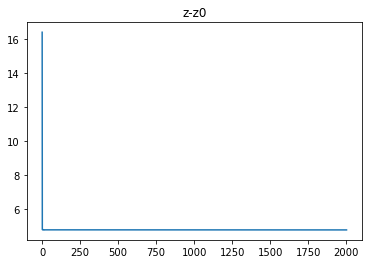

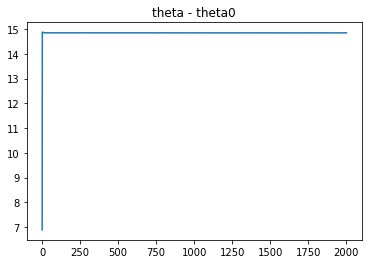

In [27]:
theta0 = (t0_bar, v0_bar, sigma_xi, sigma_tau, sigma)
theta_rand = (0,0,0,0,0)
sampling, thetas = MCMC_SAEM(y, theta0, maxIter = 2000, Nb = 1000, alpha = 3/4)

plt.title('z-z0')
plt.plot(range(len(sampling)), [normtuple(s,z0) for s in sampling])
plt.show()
plt.title('theta - theta0')
plt.plot(range(len(thetas)), [normtuple(theta,theta_rand) for theta in thetas])
plt.show()

In [14]:
theta0, thetas[-1]

((array([2.62434536]),
  array([3.62434536]),
  0.25165315823422346,
  0.17740348202347675,
  0.2048478962028625),
 (array([1.81215982]),
  array([2.81218059]),
  0.10010444389058358,
  0.05894317947520523,
  10.09278462162777))

I have a problem with my theta estimate. The difference between the estimate and the true theta should converge to 0.  When I look closer I see that the problem comes from my sigma estimates. I think the problem comes from how I implemented my y and distance function (xi, eps and tau) but I didn't have time to correct it.

## HMwG-SAEM – Hasting-Metropolis within Gibbs sampler

### Question 5 

In [15]:
sigma_prop = 0.01

def proposal_distribution_Gibbs_zi(z,i):
    (t, v, xi, tau) = z
    xi_star = deepcopy(xi)
    tau_star = deepcopy(tau)
    xi_star_i = norm.rvs(loc = xi[i], scale = sigma_prop*sigma_xi, size = 1)
    tau_star_i = norm.rvs(loc = tau[i], scale = sigma_prop*sigma_tau, size = 1)
    
    xi_star[i] = xi_star_i
    tau_star[i]= tau_star_i
    
    xi_star = xi_star.reshape(-1,1)
    tau_star = tau_star.reshape(-1,1)
    return (t, v, xi_star, tau_star)
    
def HMwG_Sampler_zi(z0):
    
    sampling = [z0]
    N = z0[-1].shape[0]
    
    for l in range(N):
        (t0, v0, xi_k, tau_k) = sampling[-1]
        (t0, v0, xi_star, tau_star) = proposal_distribution_Gibbs_zi(z = (t0, v0, xi_k, tau_k), i = l)
        tau_k = tau_k.reshape(-1,1)
        xi_k = xi_k.reshape(-1,1)
        log_pi = (xi_k[l]**2 - xi_star[l]**2)/(2*sigma_xi**2)
        log_pi += (tau_k[l]**2 - tau_star[l]**2)/(2*sigma_tau**2)
        d_k = distance(y,(t0, v0, xi_k, tau_k))
        d_star = distance(y,(t0, v0, xi_star, tau_star))
        
        log_pi += (np.linalg.norm(y - d_k)**2 - np.linalg.norm(y - d_star)**2)/(2*sigma**2)
        
        if log_pi < 0 :
            log_alpha = log_pi
            log_U = np.log(np.random.rand(1))
            
            if log_U <= log_alpha  :
                z_k = (t0, v0, xi_star, tau_star)
                
            else : 
                z_k = (t0, v0, xi_k, tau_k)
                
        else : 
            z_k = (t0, v0, xi_star, tau_star)
          

        sampling.append(z_k)
        
    return sampling

### Question 6

In [16]:
sigma_prop = 0.001

def proposal_distribution_Gibbs_zpop(z):
    (t, v, xi, tau) = z
    t_star = norm.rvs(loc = t, scale = sigma_prop*np.eye(1), size = 1)
    v_star = norm.rvs(loc = v, scale = sigma_prop*np.eye(1), size = 1)
    return (t_star, v_star, xi, tau)
    
def HMwG_Sampler_zpop(z0):
    (t0, v0, xi_k, tau_k) = sampling[-1] 
    
    tau_k = tau_k.reshape(-1,1)
    xi_k = xi_k.reshape(-1,1)
    
    (t0_star, v0_star, xi_k, tau_k) = proposal_distribution_Gibbs_zpop(z = (t0, v0, xi_k, tau_k))

    
    log_pi = ((t0 - t0_bar)**2 - (t0_star - t0_bar)**2)/(2*sigmat0**2)
    log_pi += ((v0 - v0_bar)**2 - (v0_star - v0_bar)**2)/(2*sigmav0**2)
    d_k = distance(y,(t0, v0, xi_k, tau_k))
    d_star = distance(y,(t0_star, v0_star, xi_k, tau_k))

    log_pi += (np.linalg.norm(y - d_k)**2 - np.linalg.norm(y - d_star)**2)/(2*sigma**2)
        
    if log_pi < 0 :
        log_alpha = log_pi
        log_U = np.log(np.random.rand(1))
            
        if log_U <= log_alpha  :
            z_k = (t0_star, v0_star, xi_k, tau_k)
                
        else : 
            z_k = (t0, v0, xi_k, tau_k)
                
    else : 
        z_k = (t0_star, v0_star, xi_k, tau_k)
          

        sampling.append(z_k)
        
    return sampling

### Question 7

In [17]:
def HMwG_SAEM(y, theta0, maxIter = 1000, Nb = 500, alpha = 3/4):

    nb_individuals, K  = y.shape
    (t0_k, v0_k, xi_k, tau_k) = (0,0,np.zeros(nb_individuals),np.zeros(nb_individuals))
    zk = (t0_k, v0_k, xi_k, tau_k)
    
    sampling = [zk]
    thetas = [theta0]
    
    Sk = np.zeros(5)
    thetak = theta0

    for k in range(maxIter+1):
        eps = 1
        if (k>Nb):
            eps = (k-Nb)**(-alpha)
            
        zk_sampling = HMwG_Sampler_zi(zk)[-1]
        zk_sampling = HMwG_Sampler_zpop(zk_sampling)[-1]
        (t0_k, v0_k, xi_k, tau_k) = zk_sampling
        zk = (t0_k, v0_k, xi_k, tau_k)
        Sk = Sk + eps*(S(y,zk)-Sk)
        theta_k = update_theta(y,Sk)
        sampling.append(zk)
        thetas.append(theta_k)

    return sampling, thetas      

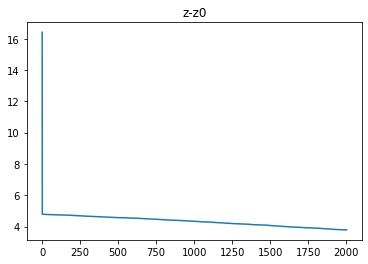

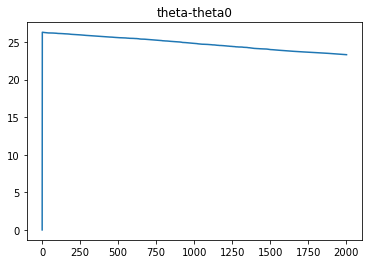

In [18]:
theta0 = (t0_bar, v0_bar, sigma_xi, sigma_tau, sigma)
theta_test = (10,10,1,1,1)
sampling, thetas = HMwG_SAEM(y, theta_test, maxIter = 2000, Nb = 1500, alpha = 3/4)

plt.title('z-z0')
plt.plot(range(len(sampling)), [normtuple(s,z0) for s in sampling])
plt.show()
plt.title('theta-theta0')
plt.plot(range(len(thetas)), [normtuple(theta,theta_test) for theta in thetas])
plt.show()

Same problem as in 4.

### Question 8 

The Block MHwG sampler updates simultaneously block (or sets) of latent variables given the others. If there is a lot of latent variable, it allows to decrease the number of iterations (but not necessarily the computing time). However, it also allows to keep the correlations between the different variables.

# Exercice 2 : Multiplicative Hasting-Metropolis

### Question 1

Firstly 
$$Y = 1_{\{\mathcal{B} = 0\}} \dfrac{X}{\epsilon} + 1_{\{\mathcal{B} = 1\}} \epsilon X$$

$\text{Let's assume that } \mathcal{B}, X \text{ and } \epsilon \, \text{are independent.}$


Let h be a measurable function.

$$\mathbb{E}[h(Y)] =  \mathbb{E}[h(Y)*1_{\{\mathcal{B} = 0\}} + h(Y)*1_{\{\mathcal{B} = 1\}} = \dfrac{\mathbb{E} \left[ h \left( \dfrac{X}{\epsilon} \right) \right] + \mathbb{E}[h(\epsilon X)]}{2}$$ 

If X = 0 :
$$\mathbb{E}[h(Y)] = h(0)$$

and then, 
$$\boxed{q(X = 0, y) =  \delta_0(y)}$$

If X is not 0 :

$$\mathbb{E}[h(Y)] = \frac{1}{2}. \left(\int_{-1}^1 h \left( \dfrac{X}{\epsilon} \right) f_{\epsilon}(\epsilon) d\epsilon + \int_{-1}^1 h \left(X.\epsilon \right) f_{\epsilon}(\epsilon) d\epsilon \right)$$

$\text{With the following diffeomorphisms : } y = \dfrac{X}{\epsilon}, \epsilon \in ]0,1] \, \text{and} \, \epsilon \in [-1,0[$

$\text{and for the second integral} \, y = X.\epsilon, \epsilon \in [-1,1]$

$$\mathbb{E}[h(Y)] = \frac{1}{2}. \left(\int_{-\infty}^{-|X|} h(y) f_{\epsilon}\left( \dfrac{X}{y} \right) \dfrac{|X|}{y^2}dy + \int_{|X|}^{\infty} h(y) f_{\epsilon}\left( \dfrac{X}{y} \right) \dfrac{|X|}{y^2}dy + \int_{-|X|}^{|X|} h(y) f_{\epsilon}\left( \dfrac{y}{X} \right) \dfrac{1}{|X|} dy \right)$$

Finally, 

$$\boxed{ q(X, y) = 1_{\{|y| > |X|\}} f_{\epsilon} \left( \dfrac{X}{y} \right) \dfrac{|X|}{2 y^2} + 1_{\{|y| < |X|\}} f_{\epsilon} \left( \dfrac{y}{X} \right) \dfrac{1}{2 |X|} 
+ \delta_0(y).1_{\{|X|=0\}}}$$

### Question 2 

Let's notice that :
$$q(X, y) = \left(1_{\{|y| > |X|\}} f_{\epsilon} \left( \dfrac{X}{y} \right)  + 1_{\{|y| < |X|\}} f_{\epsilon} \left( \dfrac{y}{X} \right)
+ \delta_0(y).1_{\{|X|=0\}}\right).\dfrac{|X|}{2 \max(X^2,y^2)}$$

$$\alpha(x,y)​=\min(1,\dfrac{\pi(y)q(y,x)}{\pi(x)q(x,y)})​=\min(1,\dfrac{\pi(y).|y|}{\pi(x).|x|})​$$

### Question 3

In [19]:
def f_eps(x):
    """return pdf f_eps"""
    return np.random.uniform(-1,1,size=1)

def f_eps_inv(x):
    """return pdf f_eps^(-1)"""
    return None

def eps_sample():
    #u = np.random.rand(1)
    #return f_eps_inv(u)
    return np.random.uniform(-1,1,size=1)

def f_Y(y,x):
    bool_1 = (abs(y)<abs(x))
    bool_2 = (abs(y)>=abs(x))
    return (bool_1*f_eps(y/x) + bool_2*f_eps(x/y)*abs(x))/(2*max(x**2,y**2))

In [20]:
def Multiplicative_Hasting_Metropolis(x0,N,pi):
    
    counter = 0
    sampling = np.zeros(N)
    X = x0
    
    while counter < N :
        
        eps = eps_sample()
        B = bernoulli.rvs(p = 0.5)
        Y = (B==1)*eps*X + (B==0)*X/eps
        
        # alpha = min([(pi(y)*f_Y(y,x)/(pi(x)*f_Y(y,x)),1])
        alpha = min([(pi(Y)*abs(Y))/(pi(X)*abs(X)+1e-5),1])
      
        U = np.random.rand(1)
        
        if U <= alpha :
            sampling[counter] = Y
            counter += 1
            X = Y
    
    return sampling

### Question 4

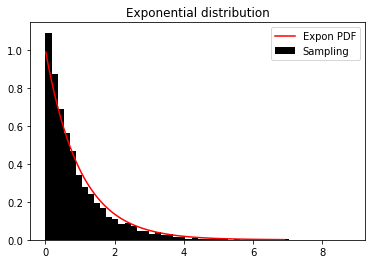

In [21]:
x0 = 10
N = 5000

pi = expon.pdf

sampling = Multiplicative_Hasting_Metropolis(x0,N,pi)  

x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.999), 100)

plt.title('Exponential distribution')
plt.hist(sampling, bins = 50, density=True, color = 'black', label = 'Sampling')
plt.plot(x,pi(x),  c = 'red', label = 'Expon PDF')
plt.legend()
plt.show()

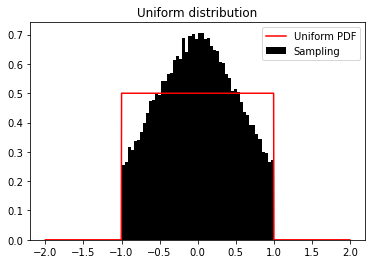

In [22]:
x0= 10
N= 50000

pi = uniform(-1,2).pdf

sampling = Multiplicative_Hasting_Metropolis(x0, N, pi)  

x = np.linspace(-2,2, 1000)

plt.title('Uniform distribution')
plt.hist(sampling, bins=50, density=True, color = 'black', label = 'Sampling')
plt.plot(x,pi(x),  c = 'red', label = 'Uniform PDF')
plt.legend()
plt.show()

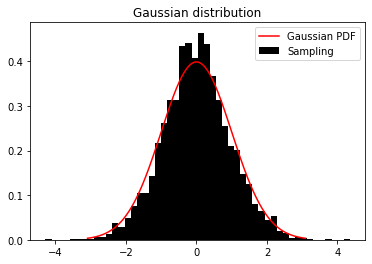

In [23]:
x0= 10
N= 5000

pi = scipy.stats.norm.pdf

sampling = Multiplicative_Hasting_Metropolis(x0, N, pi)  

x = np.linspace(norm.ppf(0.001),
                 norm.ppf(0.999), 1000)

plt.title('Gaussian distribution')
plt.hist(sampling, bins=50, density=True, color = 'black', label = 'Sampling')
plt.plot(x,pi(x),  c = 'red', label = 'Gaussian PDF')
plt.legend()
plt.show()

# Comment 
This algorithm works well for distributions
from which we can sample using the inverse transformation method and also when there is no sufficiently explicit formula for the distribution function.